In [ ]:
import matplotlib.pyplot as plt
import numpy as np 
import cvxopt
from sklearn import svm

In [ ]:
X = np.array([[0,0],[2,2],[2,0],[3,0]])
y = np.array([-1,-1,1,1])

In [ ]:
def aff_donnees(X,y,bornex,borney,s):
  plt.scatter(X[:, 0], X[:, 1], c=y, s=s, cmap='winter')
  plt.xlim(bornex)
  plt.ylim(borney)

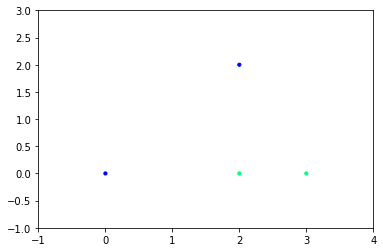

In [ ]:
bornex = [min(X[:,0])-1,max(X[:,0])+1]
borney = [min(X[:,1])-1,max(X[:,1])+1]
s = 10
aff_donnees(X,y,bornex,borney,s)

In [ ]:
def affichePlan(w,b,bornex):
  hyperplan = np.array([ - (w[0]*x+b)/w[1] for x in np.arange(bornex[0],bornex[1],1)])
  plt.plot(hyperplan)

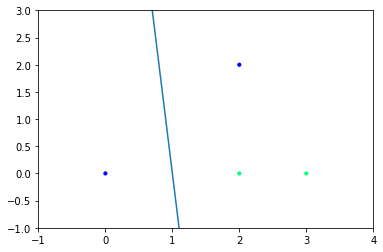

In [ ]:
w = np.array([1,0.1])
b = -1
aff_donnees(X,y,bornex,borney,s)
affichePlan(w,b,[0,5])
plt.show()

In [ ]:
def Resoud_primal(X,y):
  N= np.shape(y)[0]
  n= np.shape(X)[1]
  q= cvxopt.matrix(np.zeros((n+1,1)))
  P1=np.concatenate((np.zeros((1,1)),np.zeros((1,n))),axis=1)
  P2=np.concatenate((np.zeros((n,1)),np.eye(n)),axis=1)
  P=np.concatenate((P1,P2),axis=0)
  P=cvxopt.matrix(P)
  for i in range(N):
    g=np.concatenate((np.reshape(-y[i],(1,1)), np.reshape(-y[i]*X[i][:],(1,2))),axis=1)
    if i==0:
      G=g
    else:
      G=np.concatenate((G, g), axis=0)
  G=cvxopt.matrix(G+0.)
  h = cvxopt.matrix(- np.ones((N,1)))
  sol = cvxopt.solvers.qp(P, q, G, h)
  x= sol['x']
  b = x[0]
  w = [x[1],x[2]]
  return w,b

     pcost       dcost       gap    pres   dres
 0:  3.2653e-01  1.9592e+00  6e+00  2e+00  4e+00
 1:  1.5796e+00  8.5663e-01  7e-01  3e-16  3e-15
 2:  1.0195e+00  9.9227e-01  3e-02  5e-16  3e-15
 3:  1.0002e+00  9.9992e-01  3e-04  3e-16  2e-15
 4:  1.0000e+00  1.0000e+00  3e-06  3e-16  1e-15
 5:  1.0000e+00  1.0000e+00  3e-08  0e+00  1e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.8212e-01  5.5124e+00  1e+01  2e+00  5e+00
 1:  5.5352e-01  1.0158e+01  5e+00  1e+00  3e+00
 2:  1.0266e+00  4.3072e+01  7e+00  1e+00  3e+00
 3:  9.6056e+00  1.2385e+02  2e+01  1e+00  2e+00
 4:  5.1885e+02  2.6193e+02  3e+02  4e-15  4e-11
 5:  3.2241e+02  3.1119e+02  1e+01  1e-14  4e-11
 6:  3.1309e+02  3.1298e+02  1e-01  2e-16  7e-11
 7:  3.1300e+02  3.1300e+02  1e-03  2e-15  3e-11
 8:  3.1300e+02  3.1300e+02  1e-05  4e-15  3e-11
Optimal solution found.


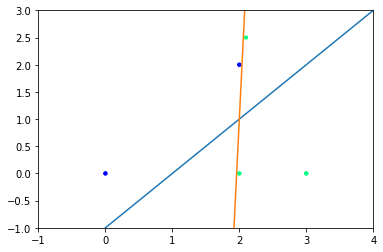

In [ ]:
aff_donnees(X,y,bornex,borney,s)

w0,b0 = Resoud_primal(X,y)
affichePlan(w0,b0,[0,5])

X1,y1 = np.append(X, [[2.1,2.5]],axis=0) , np.append(y,1)
aff_donnees(X1,y1,bornex,borney,s)

w1,b1 = Resoud_primal(X1,y1)
affichePlan(w1,b1,[0,5])

X2,y2 = np.append(X, [[1.5,2.5]],axis=0), np.append(y,1)

"""w2,b2 = Resoud_primal(X2,y2)
aff_donnees(X2,y2,bornex,borney,s)
affichePlan([w2,1],b2,[0,5])"""
#Trouve pas de solution

plt.show()


In [ ]:
def aff_frontiere(X,y,bornex,borney,model):
  aff_donnees(X,y,bornex,borney,50)
  xx, yy = np.meshgrid(np.linspace(bornex[0], bornex[1],50), np.linspace(borney[0], borney[1],50))
  xy = np.concatenate((np.reshape(xx,(xx.shape[0]*xx.shape[1],1)),np.reshape(yy,(yy.shape[0]*yy.shape[1],1))),axis=1)
  P = model.predict(xy)
  aff_donnees(xy,P,bornex,borney,1)

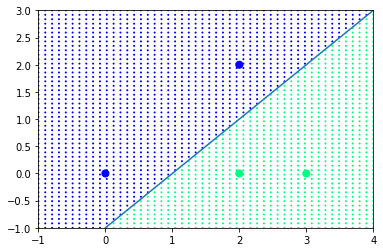

In [ ]:
model = svm.SVC(kernel='linear', C=500)
model.fit(X, y)
w = model.coef_[0]
b = model.intercept_[0]
aff_donnees(X,y,bornex,borney,s)
affichePlan(w,b,[0,5])
aff_frontiere(X,y,bornex,borney,model)
plt.show()

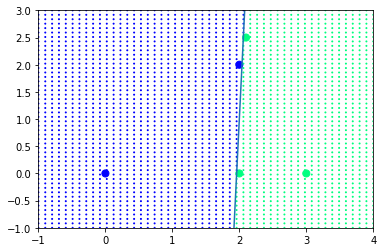

In [ ]:
model.fit(X1, y1)
w = model.coef_[0]
b = model.intercept_[0]
affichePlan(w,b,[0,5])
aff_frontiere(X1,y1,bornex,borney,model)
plt.show()

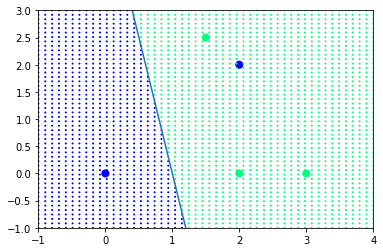

In [ ]:
model.fit(X2, y2)
w = model.coef_[0]
b = model.intercept_[0]
aff_donnees(X,y,bornex,borney,s)
affichePlan(w,b,[0,5])
aff_frontiere(X2,y2,bornex,borney,model)
plt.show()

In [ ]:
f = np.load('TP6.npz',allow_pickle=True)
X=f['arr_0']
y=f['arr_1']
bornex = [min(X[:,0])-1,max(X[:,0])+1]
borney = [min(X[:,1])-1,max(X[:,1])+1]

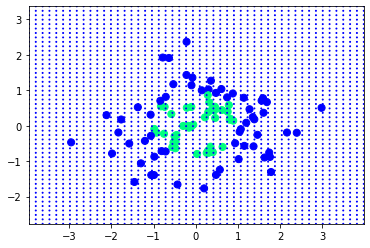

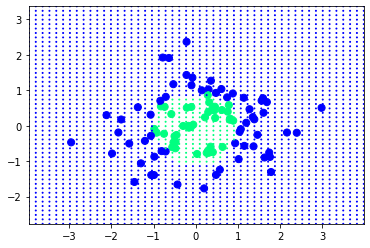

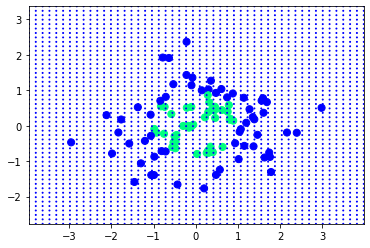

In [ ]:
model = svm.SVC(kernel='linear')
model.fit(X, y)
aff_frontiere(X,y,bornex,borney,model)
plt.show()

model = svm.SVC(kernel='rbf')
model.fit(X, y)
aff_frontiere(X,y,bornex,borney,model)
plt.show()

model = svm.SVC(kernel='poly')
model.fit(X, y)
aff_frontiere(X,y,bornex,borney,model)
plt.show()

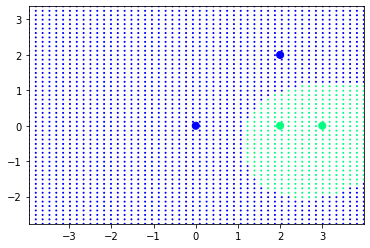

In [ ]:
X = np.array([[0,0],[2,2],[2,0],[3,0]])
y = np.array([-1,-1,1,1])
model = svm.SVC(kernel='rbf')
model.fit(X, y)
aff_donnees(X,y,bornex,borney,s)
aff_frontiere(X,y,bornex,borney,model)
plt.show()